# Integrantes
* ### David Herrera
* ### Estid Lozano
* ### Nicolás González

In [1]:
# Imports
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import openml
import pandas as pd
from imblearn.over_sampling import SMOTE
from numpy import where

from algorithms import *


# Exercise 1 (Up-Sampling)

**1.1** write a function visualize_data(df, class_att) that receives a dataframe with three
columns (the one named class_att is the label column) and creates two plots: One
shows a scatter plot of the data in the first two attributes. The second shows a bar-chart
with the class distribution

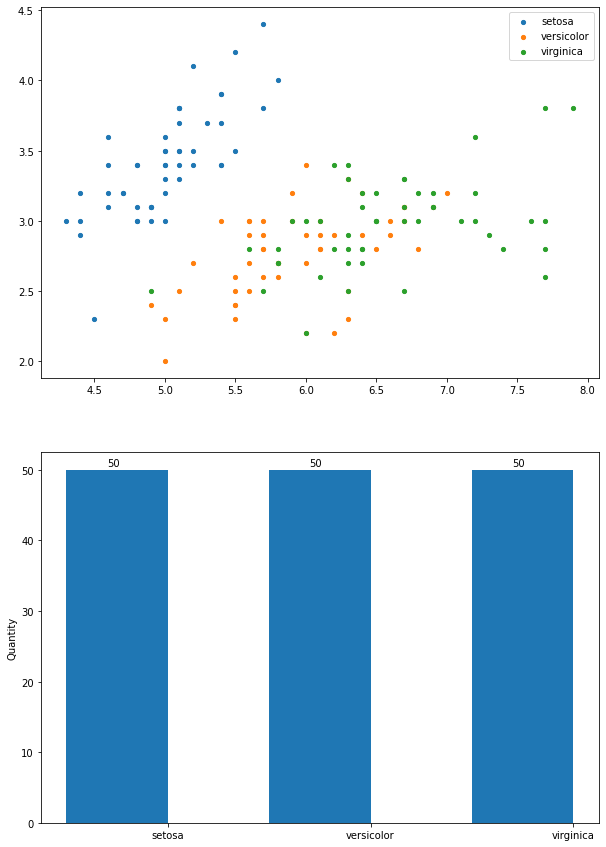

In [2]:
def visualize_data(_df,_class_att,_other_icon=False):
    # scatter plot
    classes =list(np.unique(_df[_class_att]))
    fig, ax = plt.subplots(2,1,figsize=(10,15))
    for label in classes:
        row_ix = where(_df[_class_att] == label)[0]
        ax[0].scatter(_df.iloc[row_ix, 0], _df.iloc[row_ix, 1], label=str(label),marker= "*" if _other_icon and _df.iloc[row_ix, -1].any() else ".", s=70)
    # bar plot
    ax[0].legend()
    counter = Counter(_df[_class_att])
    x = np.arange(len(classes))  
    width = 0.5  
    ax[1].bar(x - width/2, dict(counter.items()).values(), width)
    ax[1].set_ylabel('Quantity')
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(dict(counter.items()).keys())
    for i, v in enumerate(dict(counter.items()).values()):
        ax[1].text(i - width*0.6, v*1.01, str(v))
    plt.plot()
visualize_data(pd.read_csv('iris.csv'),'species')


**1.2** Load the rmftsa_sleepdata dataset from openml.org and visualize is with the above
method. Then use the SMOTE method from scikit-learn to up-sample the minority
class. Use the above function to plot the data again. Use a different color/symbol for
the up-sampled instances.

Was the upsampling successful in that it generated reasonable new instances?

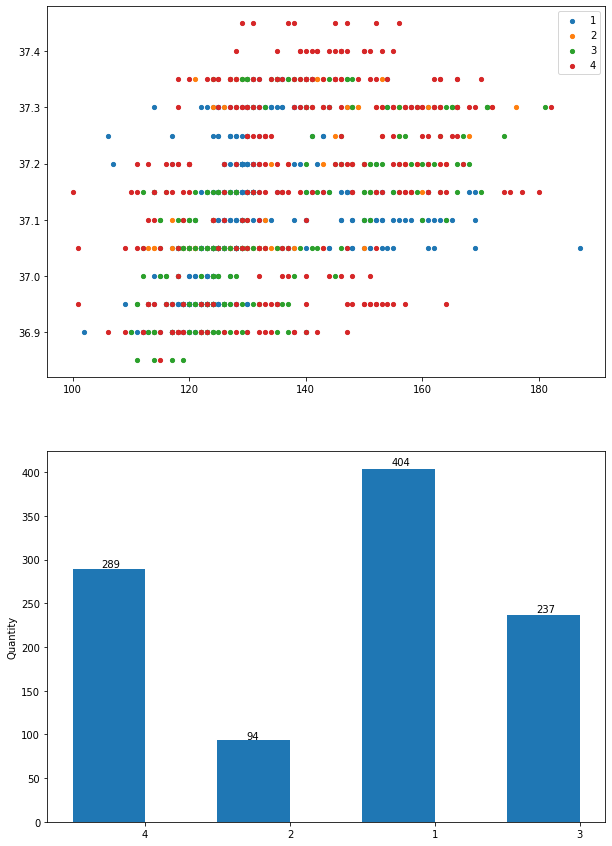

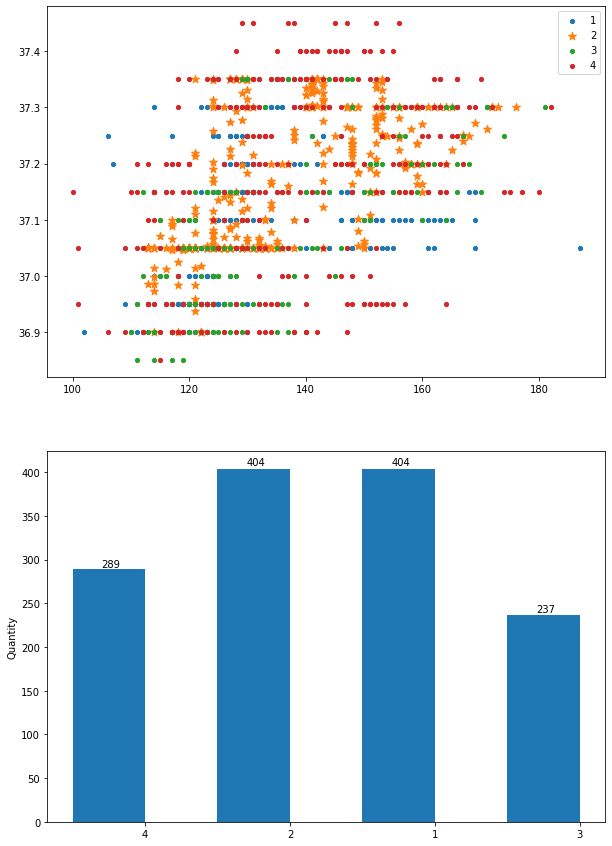

In [3]:
data = pd.read_csv('rmftsa_sleepdata.csv').reindex(['heart_rate','temperature','sleep_state'],axis=1)
visualize_data(data,'sleep_state')

oversample = SMOTE(sampling_strategy='minority')
X, y = oversample.fit_resample(data.iloc[:,:2],data["sleep_state"])

aumentedData=pd.concat([X,y],axis=1,join="inner")

t = aumentedData.ne(data).all(axis=1)
aumentedData=pd.concat([aumentedData,t],axis=1,join="inner")

aumentedData.rename(columns = {0:'diff'}, inplace = True)

visualize_data(aumentedData,'sleep_state',True)

# Exercise 2 (Feature Scaling)


Load the amazon-commerce-reviews dataset
(1457). Compare the prediction accuracy (5-fold CV) of a decision tree and logistic regression
when using none or any of the feature scaling techniques seen in class.

Report the performance of all these combinations. Does feature scaling bring an advantage?

In [7]:
def noScaling(col):
    return col
def minMaxScaling(col):
    return (col-min(col))/(max(col)-min(col))
def meanNormalization(col):
    return (col-np.mean(col))/(max(col)-min(col))
def standarization(col):
    return (col-np.mean(col))/np.std(col)
def sqrtScaling(col):
    return np.sqrt(col)
def logScaling(col):
    return np.log(col)
def unitLengthTrans(col):
    return col/col
dataset = openml.datasets.get_dataset(1457)
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="array", target=dataset.default_target_attribute
)
df = pd.DataFrame(X, columns=attribute_names)
df["class"] = y

algos=[DecisionTree(informationGain()),Logistic(_max_iter=10)]
transformations = [noScaling,minMaxScaling,meanNormalization,standarization,sqrtScaling,logScaling,unitLengthTrans]
for algo in algos:
    print("\n",type(algo).__name__)
    # df = pd.read_csv('iris.csv')
    X = df.iloc[:, :-1].to_numpy()
    Y = df.iloc[:, -1].to_numpy()
    for tr in  transformations:
        print("\t",tr.__name__)
        for column in df.iloc[:, :-1]:
            df[column]= tr(df[column])
        in_sample_error,validation_error=k_cross_validate(algo,X,Y,5,1)
        print("\t \t in_sample_error",in_sample_error)
        print("\t \t validation_error",validation_error)



 DecisionTree
	 noScaling
	 	 in_sample_error 0.7148333333333332
	 	 validation_error 0.9386666666666666
	 minMaxScaling
	 	 in_sample_error 0.7135
	 	 validation_error 0.9426666666666665
	 meanNormalization
	 	 in_sample_error 0.7138333333333333
	 	 validation_error 0.9480000000000001
	 standarization
	 	 in_sample_error 0.7121666666666666
	 	 validation_error 0.9366666666666668
	 sqrtScaling
	 	 in_sample_error 0.7133333333333333
	 	 validation_error 0.9339999999999999
	 logScaling
	 	 in_sample_error 0.7113333333333334
	 	 validation_error 0.9386666666666666
	 unitLengthTrans
	 	 in_sample_error 0.7083333333333334
	 	 validation_error 0.9453333333333334

 Logistic
	 noScaling
	 	 in_sample_error 0.9800000000000001
	 	 validation_error 0.9800000000000001
	 minMaxScaling


# Exercise 3 (Feature Extraction)


Load the amazon-commerce-reviews dataset.
Compare the prediction accuracy (5-fold CV) of a decision tree and logistic regression when
using the original against landmark features (using all the (training) datapoints as landmarks).

Report the performances. Does landmarking bring an advantage?

# Exercise 4  (Feature Selection)


Load the madelon dataset (1485). Compare the
prediction accuracy (5-fold CV) of a decision tree and logistic regression when using none or the
sklearn.feature_selection.chi2 or the sklearn.feature_selection.mutual_info_classif
criterion.

Use different selectors, e.g., SelectKBest, SelectPercentile, and GenericUnivariateSelect wit
different parameters.

Report the performance of all these combinations. Does feature scaling bring an advantage?